# Predicting Stock price of Tata Motors using LSTM for year 2017

### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import pandas_datareader as web

In [2]:
dataset = pd.read_csv(r'C:\Users\hp\Downloads\TATAMOTORS_2011.csv')

In [3]:
dataset

,Date,Open,High,Low,Last,Close,Volume
0,2011-01-03,1327.7,1335.00,1301.20,1305.00,1308.45,1678140
1,2011-01-04,1313.9,1320.60,1285.05,1296.00,1298.40,2333384
2,2011-01-05,1300.0,1309.90,1276.00,1277.30,1282.80,1576151
3,2011-01-06,1289.2,1300.90,1248.35,1263.50,1261.00,2182701
4,2011-01-07,1260.0,1263.35,1160.00,1182.00,1190.20,4318326
...,...,...,...,...,...,...,...
242,2011-12-26,186.0,188.65,185.10,186.30,186.75,7097843
243,2011-12-27,186.0,186.40,180.85,182.35,182.10,6199700
244,2011-12-28,181.0,183.50,178.85,179.60,180.20,8777190
245,2011-12-29,178.4,182.50,178.10,178.95,179.15,9982150


In [4]:
dataset.head()

,Date,Open,High,Low,Last,Close,Volume
0,2011-01-03,1327.7,1335.00,1301.20,1305.0,1308.45,1678140
1,2011-01-04,1313.9,1320.60,1285.05,1296.0,1298.40,2333384
2,2011-01-05,1300.0,1309.90,1276.00,1277.3,1282.80,1576151
3,2011-01-06,1289.2,1300.90,1248.35,1263.5,1261.00,2182701
4,2011-01-07,1260.0,1263.35,1160.00,1182.0,1190.20,4318326


In [5]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Volume
242,2011-12-26,186.0,188.65,185.10,186.30,186.75,7097843
243,2011-12-27,186.0,186.40,180.85,182.35,182.10,6199700
244,2011-12-28,181.0,183.50,178.85,179.60,180.20,8777190
245,2011-12-29,178.4,182.50,178.10,178.95,179.15,9982150
246,2011-12-30,180.5,183.80,176.80,178.35,178.70,9288032


In [6]:
dataset.isna().any()   #used to detect not applicable values

Date      False
Open      False
High      False
Low       False
Last      False
Close     False
Volume    False
dtype: bool

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    247 non-null    object 
 1   Open    247 non-null    float64
 2   High    247 non-null    float64
 3   Low     247 non-null    float64
 4   Last    247 non-null    float64
 5   Close   247 non-null    float64
 6   Volume  247 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

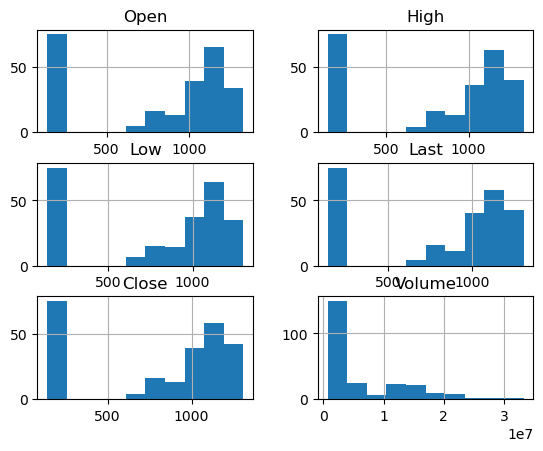

In [8]:
dataset.hist()

Text(0.5, 1.0, 'Opening price of Tata Motors')

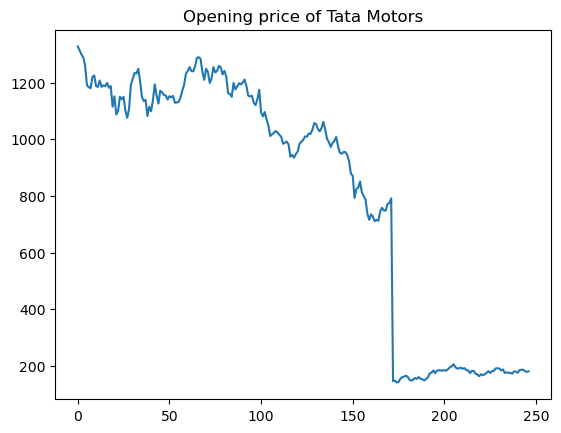

In [9]:
plt.plot(dataset['Open'])
plt.title('Opening price of Tata Motors')

Text(0.5, 1.0, 'Closing price of Tata Motors')

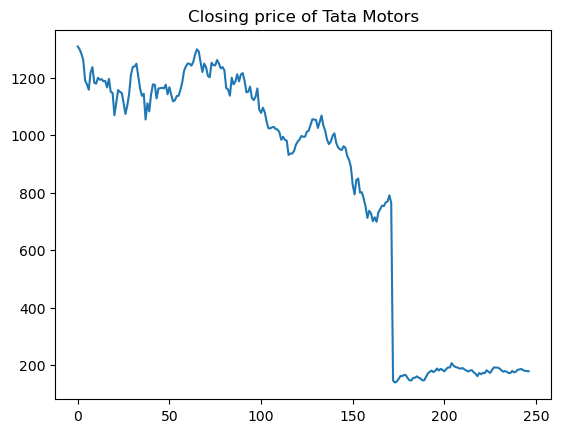

In [10]:
plt.plot(dataset['Close'])
plt.title("Closing price of Tata Motors")

In [11]:
#7 day rolling mean of stock price
dataset.rolling(7).mean().head(30)

C:\Users\hp\AppData\Local\Temp\ipykernel_31264\3138029343.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  dataset.rolling(7).mean().head(30)


,Open,High,Low,Last,Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,1266.528571,1276.507143,1224.078571,1239.435714,1239.371429,3.013364e+06
7,1245.428571,1260.521429,1206.192857,1227.435714,1226.450000,3.457029e+06
8,1232.157143,1250.000000,1195.757143,1218.650000,1217.635714,3.942737e+06
9,1221.442857,1237.871429,1180.900000,1205.607143,1203.292857,4.208840e+06


### Comparing opening and closing prices

C:\Users\hp\AppData\Local\Temp\ipykernel_31264\538640725.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  dataset.rolling(window=30).mean()['Close'].plot()


<Axes: >

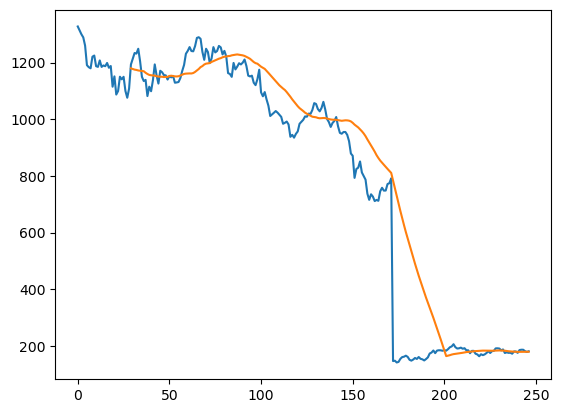

In [12]:
plt.plot(dataset['Open'])
dataset.rolling(window=30).mean()['Close'].plot()

<Axes: >

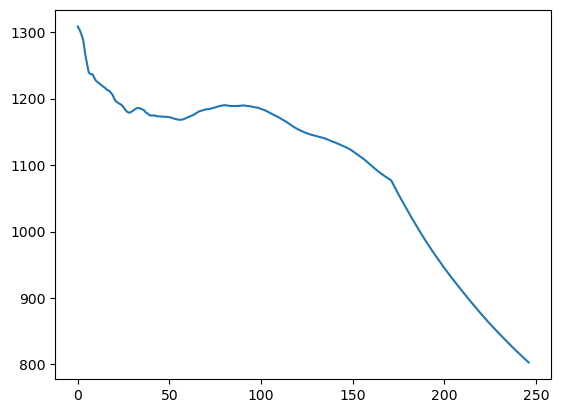

In [13]:
dataset['Close'].expanding(min_periods=1).mean().plot()

### Preprocessing dataset

In [14]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [15]:
#Data cleaning
#removing all that is not applicable 
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Last      False
Close     False
Volume    False
dtype: bool

In [16]:
#feature scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

#### Creating data structure with 60 timestamps and 1 output

In [17]:
x_train = []
y_train = []
for i in range(60,len(dataset)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [18]:
#reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

### Building LSTM


LSTM model is composed of sequential input layer, 3 lstm layers and a dense layer with activation followed by a dense op layer with linear activation function

In [19]:
model = Sequential()

Adding LSTM layers and Dropout(a regularisation technique to reduce overfitting in NN)

In [20]:
#Input Layer
model.add(LSTM(units=50,return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

In [21]:
#LSTM Layer 1
model.add(LSTM(units=50,return_sequences = True))
model.add(Dropout(0.2))

In [22]:
#LSTM Layer 2
model.add(LSTM(units=50,return_sequences = True))
model.add(Dropout(0.2))

In [23]:
#LSTM Layer 3
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [24]:
#Output Layer
model.add(Dense(units=1))

In [25]:
#compiling RNN
model.compile(loss='mean_squared_error', optimizer='adam')    #adam (Adaptive movement estimation)

#Fitting RNN into training_set
model.fit(x_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
6/6 [==============================] - 18s 140ms/step - loss: 0.1692
Epoch 2/100
6/6 [==============================] - 1s 229ms/step - loss: 0.0719
Epoch 3/100
6/6 [==============================] - 1s 158ms/step - loss: 0.0485
Epoch 4/100
6/6 [==============================] - 1s 168ms/step - loss: 0.0313
Epoch 5/100
6/6 [==============================] - 1s 198ms/step - loss: 0.0302
Epoch 6/100
6/6 [==============================] - 1s 173ms/step - loss: 0.0200
Epoch 7/100
6/6 [==============================] - 1s 184ms/step - loss: 0.0188
Epoch 8/100
6/6 [==============================] - 1s 181ms/step - loss: 0.0190
Epoch 9/100
6/6 [==============================] - 1s 168ms/step - loss: 0.0182
Epoch 10/100
6/6 [==============================] - 1s 177ms/step - loss: 0.0148
Epoch 11/100
6/6 [==============================] - 1s 159ms/step - loss: 0.0158
Epoch 12/100
6/6 [==============================] - 1s 176ms/step - loss: 0.0141
Epoch 13/100
6/6 [==================

### Making prediction and visualising result

#### Getting real stock price

In [26]:
test_dataset=pd.read_csv(r'C:\Users\hp\Downloads\TATAMOTORS_2011.csv',index_col='Date',parse_dates=True)

In [27]:
orig_price=test_dataset.iloc[:,1:2].values

In [28]:
test_dataset.head()

,Open,High,Low,Last,Close,Volume
Date,,,,,,
2011-01-03,1327.7,1335.00,1301.20,1305.0,1308.45,1678140
2011-01-04,1313.9,1320.60,1285.05,1296.0,1298.40,2333384
2011-01-05,1300.0,1309.90,1276.00,1277.3,1282.80,1576151
2011-01-06,1289.2,1300.90,1248.35,1263.5,1261.00,2182701
2011-01-07,1260.0,1263.35,1160.00,1182.0,1190.20,4318326


In [29]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2011-01-03 to 2011-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    247 non-null    float64
 1   High    247 non-null    float64
 2   Low     247 non-null    float64
 3   Last    247 non-null    float64
 4   Close   247 non-null    float64
 5   Volume  247 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB


In [30]:
test_set=test_dataset['Open']
test_set=pd.DataFrame(test_set)

In [31]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2011-01-03 to 2011-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    247 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


array([[<Axes: title={'center': 'Open'}>]], dtype=object)

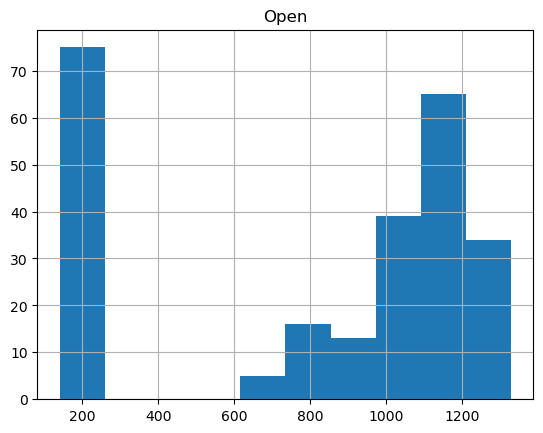

In [32]:
test_set.hist()

#### Getting the predicted Stock price

In [33]:
total_dataset = pd.concat((dataset['Open'],test_dataset['Open']), axis = 0)
inputs=total_dataset[len(total_dataset)-len(test_dataset)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
x_test=[]
for i in range(60,300):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [35]:
pred_price=model.predict(x_test)
pred_price=sc.inverse_transform(pred_price)

8/8 [==============================] - 6s 45ms/step


In [36]:
pred_price=pd.DataFrame(pred_price)
pred_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


#### Visualising results

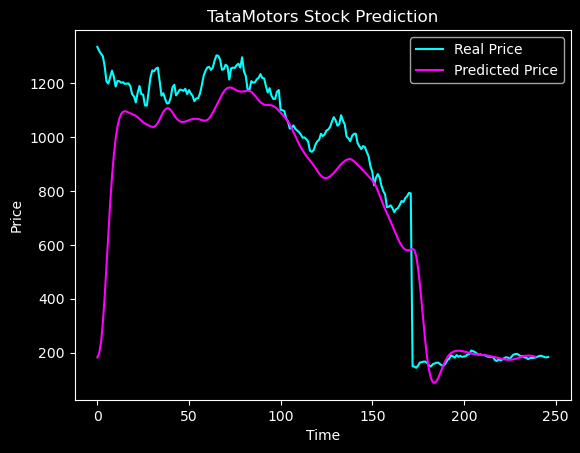

In [37]:
plt.style.use('dark_background')
plt.plot(orig_price,color='cyan',label='Real Price')
plt.plot(pred_price,color='magenta',label="Predicted Price")
plt.title("TataMotors Stock Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Conclusion:


##### Year 2017 proved to be a challenging year for Tata Motors.
##### Its Stock prices dipped down from its year high 1335 to 184 at year end.
##### Reasons for this could be certainly many as TataMotors, then was highly dependent on Chineses market and uncertainity in Chinese market affected TataMotors highly.
##### Year 2016-2017 was the rise of its Downfall which we can clearly see in the data

##### Moreover our prediction regarding it's Opening stock price was quite accurate.